In [1]:
Final Project SMS Detection

SyntaxError: invalid syntax (2304780703.py, line 1)

In [ ]:
ID:
Email:
Name: 

In [ ]:
1. Load the dataset

1. Data exploration -what did you learn? [20 points]

In [5]:
import pandas as pd
df= pd.read_csv("/home/didko/ml_files/sms-detection/spam.csv", encoding='latin1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df.head


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
df = df.rename(columns={"v1": "labels", "v2": "text"})[["labels","text"]]
#data examination

#Here we see that table has 5572 rows and 2 columns
df.shape

#Both features are of type object
print(df.info())

#Here we see that ham messages are much more than spam messages
df.groupby(["labels"]).describe(percentiles=[])
df["labels"].value_counts()

#df.describe(include=["object","object"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


labels
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
import numpy as np 
np.unique(df.labels) 

array(['ham', 'spam'], dtype=object)

2. Calculate TFIDF features [10 points]
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a text to a matrix of TF-IDF features.
vectorizer = TfidfVectorizer()
corpus = df.text
X = vectorizer.fit_transform(df.text)
features = vectorizer.get_feature_names_out()
X.shape

(5572, 8672)

In [ ]:
3. what is the problem with TFIDF with large datasets? [no points]

In [ ]:
#The problem is that we have too many features and
#a lot of options and it is too hard for train

3.1. Create dataset using feature selection method for your choice [10 points]

(5572, 8672)
(5572, 60)
              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      1002
        spam       0.80      0.99      0.89       113

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.98      1115



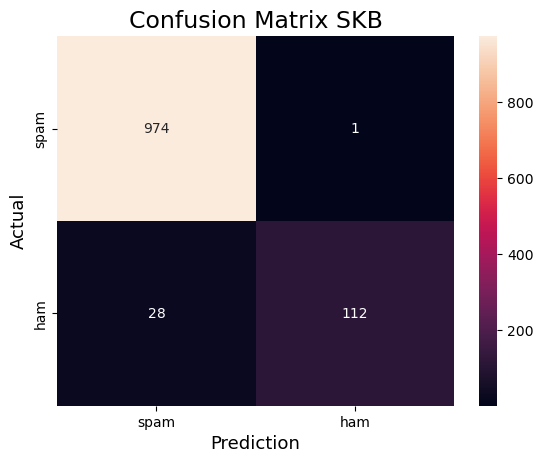

In [21]:
#Select k best
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y=df.labels
print(X.shape)

#Feature selection with Select K best
X_new = SelectKBest(chi2, k=60).fit_transform(X, y)
print(X_new.shape)
    
#classifier and report
X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_new,df.labels, test_size=0.2, random_state=105)
rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train_skb, y_train_skb)
y_predicted_skb = rf.predict(X_test_skb)
target_names = ['ham', 'spam']
print(classification_report(y_predicted_skb, y_test_skb, target_names=target_names))

#create confusion matrix and plot the table
cm = confusion_matrix(y_test_skb,y_predicted_skb)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['spam','ham'],
            yticklabels=['spam','ham'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix SKB',fontsize=17)
plt.show()

3.2. Create alternative dataset using using PCA [10 points]


              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1496
        spam       0.78      0.97      0.86       176

    accuracy                           0.97      1672
   macro avg       0.89      0.97      0.92      1672
weighted avg       0.97      0.97      0.97      1672



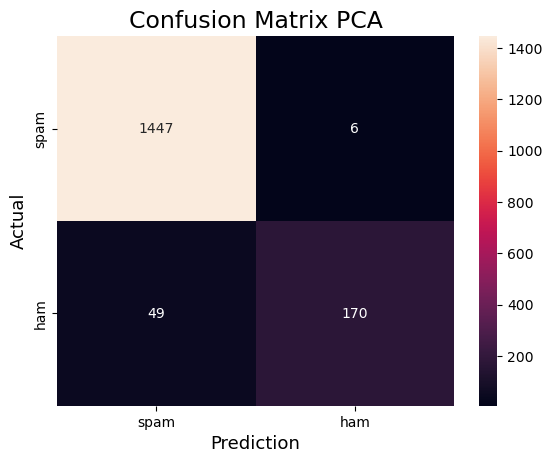

In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Dimensionality reduction
svd = TruncatedSVD(n_components=30, n_iter=15, random_state=42)
X_3 = svd.fit_transform(X)

#Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_3, df.labels, test_size=0.3, random_state=42)

#Implement RandomForestClassifier and predict data
rf = RandomForestClassifier(max_depth=20, random_state=42)
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)

#Generate classification report
target_names = ['ham', 'spam']
print(classification_report(y_predicted, y_test, target_names=target_names))

#create confusion matrix and plot the table 
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['spam','ham'],
            yticklabels=['spam','ham'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix PCA',fontsize=17)
plt.show()

3.3 what is the difference between PCA and feature selection [10 points]

In [ ]:
In PCA data is tranformed to another dimensions based on number of the features we want to use.
In Select K best we only select features and throw the other data away.

4. Based on supervised learning compare between 3.1 and 3.2  [10 points]

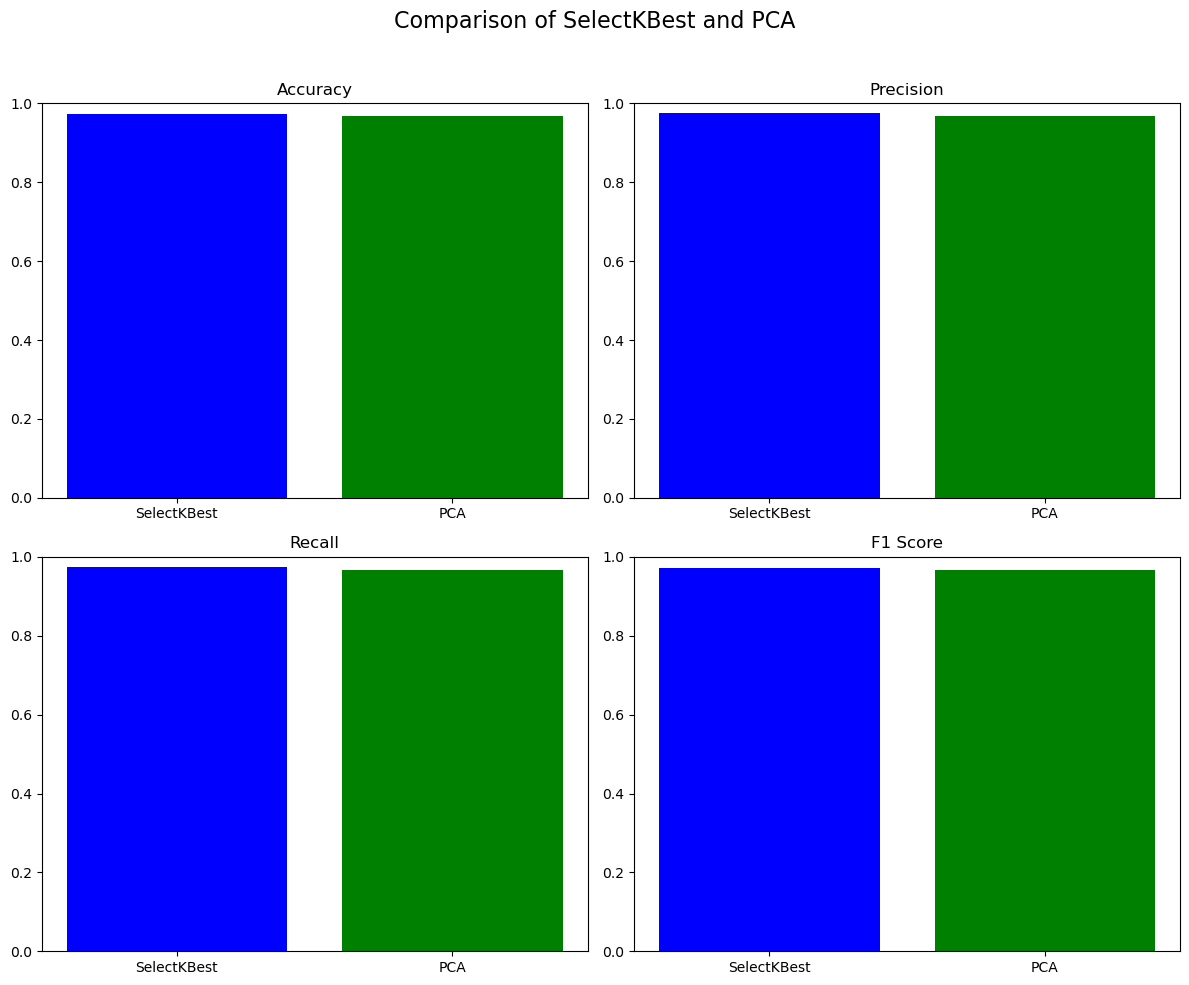

In [24]:
#Plot results
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

metrics = {
    'Model': ['SelectKBest', 'PCA'],
    'Accuracy': [accuracy_score(y_test_skb, y_predicted_skb), accuracy_score(y_test, y_predicted)],
    'Precision': [precision_score(y_test_skb, y_predicted_skb, average='weighted'), precision_score(y_test, y_predicted, average='weighted')],
    'Recall': [recall_score(y_test_skb, y_predicted_skb, average='weighted'), recall_score(y_test, y_predicted, average='weighted')],
    'F1 Score': [f1_score(y_test_skb, y_predicted_skb, average='weighted'), f1_score(y_test, y_predicted, average='weighted')]
}
df_metrics = pd.DataFrame(metrics)
# Accuracy plot
ax[0, 0].bar(df_metrics['Model'], df_metrics['Accuracy'], color=['blue', 'green'])
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylim([0, 1])

# Precision plot
ax[0, 1].bar(df_metrics['Model'], df_metrics['Precision'], color=['blue', 'green'])
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim([0, 1])

#Recall
ax[1, 0].bar(df_metrics['Model'], df_metrics['Recall'], color=['blue', 'green'])
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim([0, 1])

# F1 Score plot
ax[1, 1].bar(df_metrics['Model'], df_metrics['F1 Score'], color=['blue', 'green'])
ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim([0, 1])

fig.suptitle('Comparison of SelectKBest and PCA', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

5. Can you improve the results shown in  (4) [30 points]

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       995
        spam       0.80      1.00      0.89       120

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115

Accuracy of the ensemble: 97.30941704035875 %
Confusion matrix:


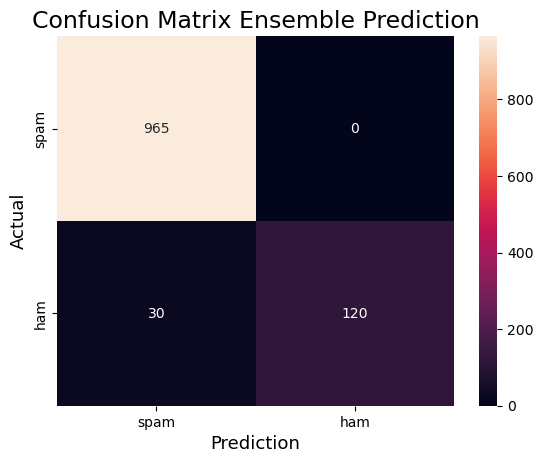

In [25]:
#The results can be improved by optimizing parameters provided to
#classifiers or try with different classifiers and combine them

#THE WISDOM OF CROWD
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define three different models
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(random_state=42, probability=True)

# Combine the models using majority voting
ensemble = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)
y_predicted = ensemble.predict(X_test)

#Generate classification report
target_names = ['ham', 'spam']
print(classification_report(y_predicted, y_test, target_names=target_names))

# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(X_test, y_test)*100} %")
print("Confusion matrix:")
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['spam','ham'],
            yticklabels=['spam','ham'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix Ensemble Prediction',fontsize=17)
plt.show()